In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Step 1: Load the dataset
print("="*50)
print("STEP 1: LOADING THE DATASET")
print("="*50)

# Load Iris dataset from seaborn
iris = sns.load_dataset('iris')
print("Dataset loaded successfully!")

# Step 2: Basic data inspection
print("\n" + "="*50)
print("STEP 2: BASIC DATA INSPECTION")
print("="*50)

# Print shape of the dataset
print(f"\n1. Dataset Shape: {iris.shape}")
print(f"   - Rows: {iris.shape[0]}")
print(f"   - Columns: {iris.shape[1]}")

# Print column names
print(f"\n2. Column Names:")
for i, col in enumerate(iris.columns, 1):
    print(f"   {i}. {col}")

# Print first few rows
print(f"\n3. First 5 rows of the dataset:")
print(iris.head())

STEP 1: LOADING THE DATASET
Dataset loaded successfully!

STEP 2: BASIC DATA INSPECTION

1. Dataset Shape: (150, 5)
   - Rows: 150
   - Columns: 5

2. Column Names:
   1. sepal_length
   2. sepal_width
   3. petal_length
   4. petal_width
   5. species

3. First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Step 3: Summary statistics
print("\n" + "="*50)
print("STEP 3: SUMMARY STATISTICS")
print("="*50)

# Using info() - data types and memory usage
print("\n1. Dataset Info:")
print(iris.info())

# Using describe() - statistical summary
print("\n2. Statistical Summary:")
print(iris.describe())

# Additional statistics - by species
print("\n3. Statistical Summary by Species:")
print(iris.groupby('species').describe())


STEP 3: SUMMARY STATISTICS

1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

2. Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000 


STEP 4: DATA VISUALIZATION
Creating visualizations...

   - Creating scatter plots...
   - Creating pairplot (this may take a moment)...


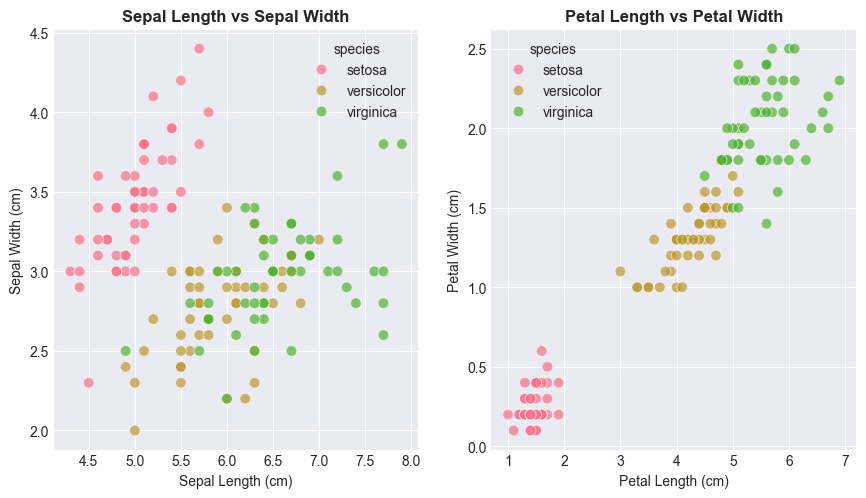

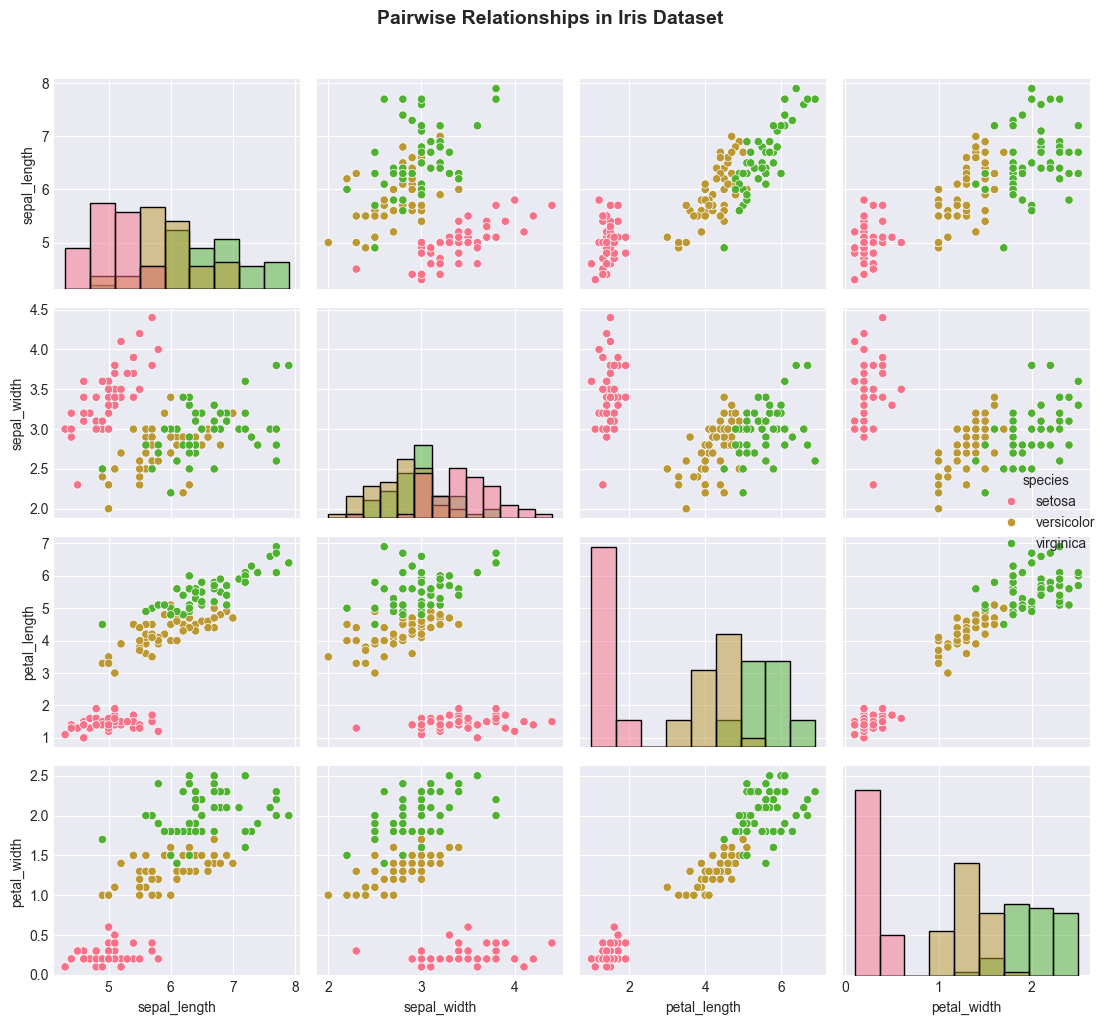

   - Creating histograms...
   - Creating box plots...


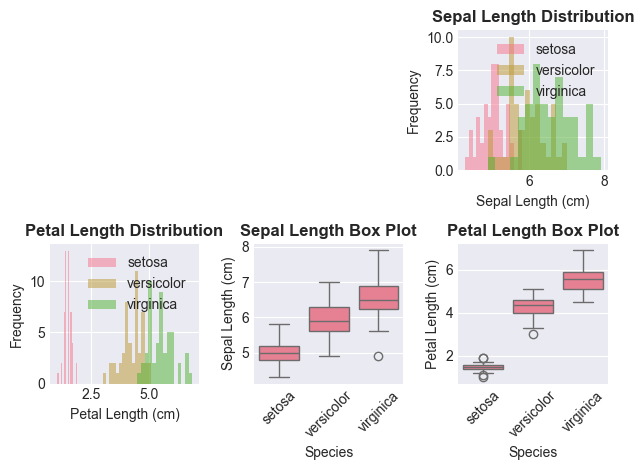

   - Creating correlation heatmap...


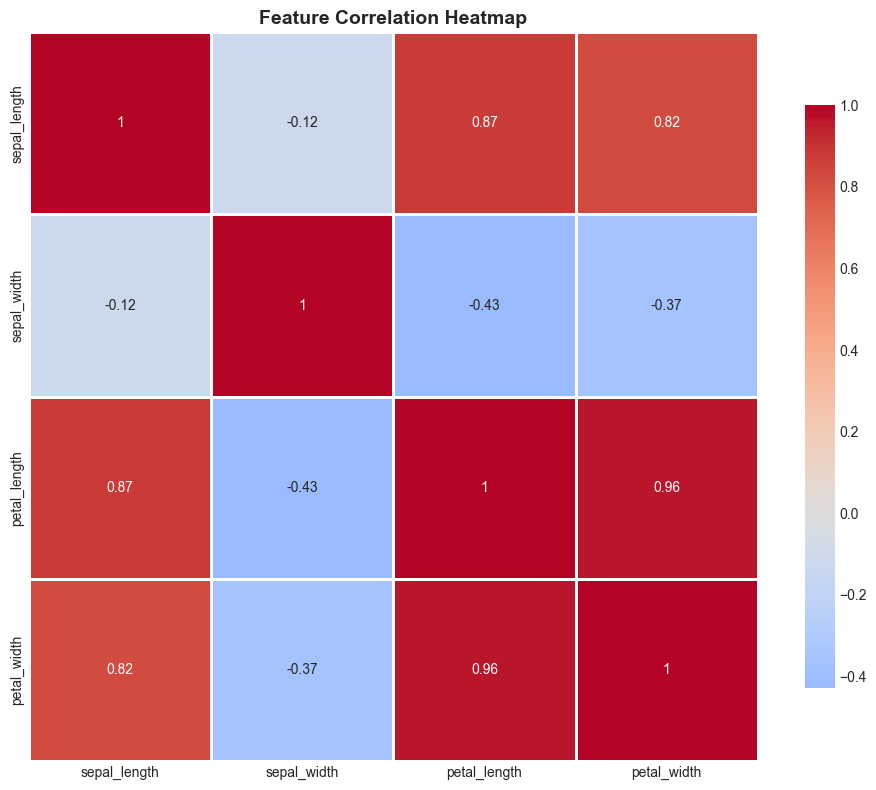

   - Creating violin plots...


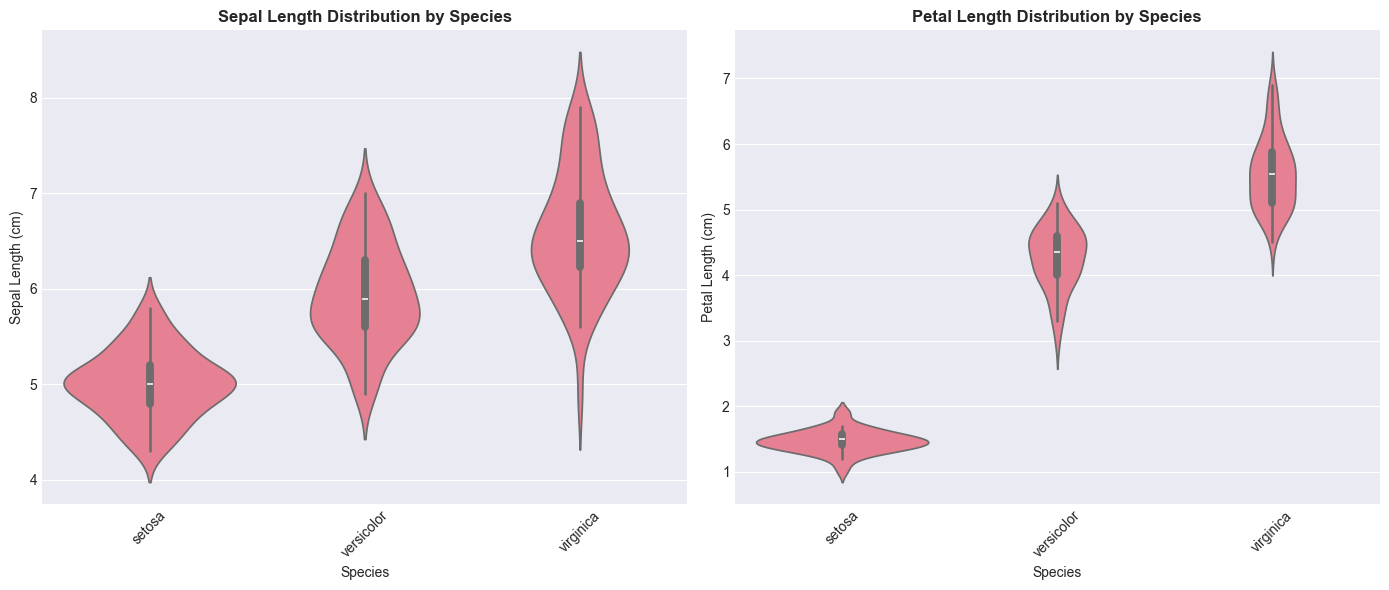

In [4]:
# Step 4: Data Visualization
print("\n" + "="*50)
print("STEP 4: DATA VISUALIZATION")
print("="*50)
print("Creating visualizations...")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 4.1: Scatter Plot - Relationships between features
print("\n   - Creating scatter plots...")
ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', 
                hue='species', s=60, alpha=0.7)
plt.title('Sepal Length vs Sepal Width', fontsize=12, fontweight='bold')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

ax2 = plt.subplot(2, 3, 2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', 
                hue='species', s=60, alpha=0.7)
plt.title('Petal Length vs Petal Width', fontsize=12, fontweight='bold')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# 4.2: Pairplot - All feature relationships
print("   - Creating pairplot (this may take a moment)...")
sns.pairplot(iris, hue='species', height=2.5, diag_kind='hist')
plt.suptitle('Pairwise Relationships in Iris Dataset', 
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('iris_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.3: Histograms - Value distributions
print("   - Creating histograms...")
ax3 = plt.subplot(2, 3, 3)
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    plt.hist(subset['sepal_length'], alpha=0.5, label=species, bins=15)
plt.title('Sepal Length Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend()

ax4 = plt.subplot(2, 3, 4)
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    plt.hist(subset['petal_length'], alpha=0.5, label=species, bins=15)
plt.title('Petal Length Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()

# 4.4: Box Plots - Outlier detection
print("   - Creating box plots...")
ax5 = plt.subplot(2, 3, 5)
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.title('Sepal Length Box Plot', fontsize=12, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.xticks(rotation=45)

ax6 = plt.subplot(2, 3, 6)
sns.boxplot(data=iris, x='species', y='petal_length')
plt.title('Petal Length Box Plot', fontsize=12, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('iris_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.5: Correlation Heatmap
print("   - Creating correlation heatmap...")
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = iris.select_dtypes(include=[np.number]).columns
correlation = iris[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('iris_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.6: Violin Plots - Distribution and probability density
print("   - Creating violin plots...")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(data=iris, x='species', y='sepal_length', ax=axes[0])
axes[0].set_title('Sepal Length Distribution by Species', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Length (cm)')
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(data=iris, x='species', y='petal_length', ax=axes[1])
axes[1].set_title('Petal Length Distribution by Species', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Petal Length (cm)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('iris_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Step 5: Key Observations
print("\n" + "="*50)
print("STEP 5: KEY OBSERVATIONS")
print("="*50)

print("\n📊 Dataset Overview:")
print(f"   • Total samples: {iris.shape[0]}")
print(f"   • Features: {iris.shape[1]-1} numeric features + 1 categorical species")
print(f"   • Species: {', '.join(iris['species'].unique())}")

print("\n📈 Statistical Insights:")
print("   • Petal measurements show greater variation between species than sepal measurements")
print("   • Setosa species is clearly separable from others based on petal features")
print("   • Strong positive correlation between petal length and petal width")

print("\n🔍 Outlier Detection:")
print("   • Few outliers detected in sepal width for Versicolor and Virginica")
print("   • Petal measurements show minimal outliers")
print("   • Setosa species shows consistent measurements with no significant outliers")

print("\n✅ Analysis complete! Visualizations have been saved as PNG files.")
print("\n📁 Generated files:")
print("   • iris_pairplot.png")
print("   • iris_visualizations.png")
print("   • iris_correlation.png")
print("   • iris_violin_plots.png")